# Data

-----------------------------

- **Auteur** : Tarik Boumaza
- **Date** : 14 Mai 2021

-----------------------------

Imports

In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import scipy.stats

### 1. Pollution

#### 1.1 Mesures par les stations

- *Source* : [***ATMO***](https://api.atmo-aura.fr/documentation)

- Traitement :
  - Chaque fichier `polluant.csv` contient toutes les mesures effectuées par les stations situées dans un rayon de 20km des urgences des HCL disponibles sur le site de l'ATMO
  - Pour chacun des ces fichiers
      - Suppression des colonnes inutiles
      - Sauvegarde 

In [2]:
polluants = ['no','no2','o3','pm2,5','pm10']
stations = ['FR20002','FR20003','FR20004','FR20008','FR20013','FR20016','FR20017','FR20019','FR20020','FR20026','FR20029','FR20030','FR20031','FR20033','FR20034','FR20036','FR20037','FR20038','FR20045','FR20046','FR20048','FR20049','FR20055','FR20060','FR20061','FR20062','FR20063','FR20064','FR20065','FR20066','FR20067','FR20069','FR20070','FR20071','FR20077','FR20204']
colonnes_inutiles = ['mesure_id','validation','code_polluant','label_polluant','id_poll_ue','label_court_polluant','label_unite','label_court_unite','unite']
df_pollution = []


def str_to_float(string):
    avant = ""
    apres = ""
    i = 0
    while(i < len(string) and (string[i] != ',' and string[i] != '.')):
        avant = avant + string[i]
        i = i + 1
    i = i + 1
    while(i < len(string)):
        apres = apres + string[i]
        i = i + 1
    return float(avant + '.' + apres)
    
    
def read_file(polluant):
    filename = 'pollution/mesures/init/' + polluant + '.csv'
    temp_df = pd.read_csv(filename, sep=";")
    for i in range(len(colonnes_inutiles)):
        del temp_df[colonnes_inutiles[i]]
    data = []
    nom_ligne = []
    for i in range(len(temp_df)):
        nom_ligne.append(temp_df.iloc[i,0][0:10])
        temp = []
        temp.append(temp_df.iloc[i,2])
        temp.append(str_to_float(str(temp_df.iloc[i,1])))
        data.append(temp)
    ar = numpy.array(data)
    temp_df = pd.DataFrame(ar, index = nom_ligne, columns = ['id_station', 'valeur'])
    return temp_df

def save(step):
    for i in range(len(polluants)):
        filename  = str('pollution/mesures/' + step + '/' + str(polluants[i]) + '_' + step + '.csv')
        df_pollution[i].to_csv(filename, sep=";", header=True)
        string = 'Saved to : \'' + filename + '\''
        print(string)

In [3]:
print('Reading file...')
print("Processing: ", end='')
percent = 0
for i in range(len(polluants)):
    if (int(i*100 / len(polluants)) > percent):
            percent = int(i*100 / len(polluants))
            string = str(percent) + "% - "
            print(string, end = '')
    df_pollution.append(read_file(polluants[i]))
    
print("100%\n")

save('reshaped')

Reading file...
Processing: 

/home/tarik/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


20% - 40% - 60% - 80% - 100%

Saved to : 'pollution/mesures/reshaped/no_reshaped.csv'
Saved to : 'pollution/mesures/reshaped/no2_reshaped.csv'
Saved to : 'pollution/mesures/reshaped/o3_reshaped.csv'
Saved to : 'pollution/mesures/reshaped/pm2,5_reshaped.csv'
Saved to : 'pollution/mesures/reshaped/pm10_reshaped.csv'


#### 1.3 Pollution et démographie

Récupère la liste de toutes les stations dont les valeurs sont données dans le fichier

In [4]:
def get_liste_stations(dataframe):
    i = 0
    liste_stations = []
    while(i < len(dataframe)):
        if not (dataframe.iloc[i,0] in liste_stations):
            liste_stations.append(dataframe.iloc[i,0])
        i = i + 1
    return liste_stations

def elimine_doublons(entree):
    sortie = [entree[0]]
    i = 1
    while (i < len(entree)):
        if entree[i] != sortie[len(sortie) - 1]:
            sortie.append(entree[i])
        i = i + 1
    return sortie

Crée un dataframe de la bonne taille en initialisant les valeurs à -1 (valeur inconnue)

In [5]:
def init_df(dataframe):
    temp_df = []
    liste_stations = get_liste_stations(dataframe)
    for i in range(len(elimine_doublons(dataframe.index))):
        temp = []
        for j in range(len(liste_stations)):
            temp = temp + [float(-1.0)]
        temp_df.append(temp)

    ar = numpy.array(temp_df)
    temp_df = pd.DataFrame(ar, index = elimine_doublons(dataframe.index), columns = liste_stations)
    temp_df
    return temp_df

def affecte_valeur_correspondante(temp_df, dataframe):
    i = 0
    k = -1
    last = ''
    while (i < len(dataframe)):
        if (dataframe.index[i] != last):
            last = dataframe.index[i]
            k = k + 1
        temp_df[dataframe.iloc[i,0]][k] = dataframe.iloc[i,1]
        i = i + 1
    return temp_df

In [6]:
print("Processing: ", end='')
percent = 0
for i in range(len(df_pollution)):
    if (int(i*100 / len(polluants)) > percent):
            percent = int(i*100 / len(polluants))
            string = str(percent) + "% - "
            print(string, end = '')
    temp_df = init_df(df_pollution[i])
    df_pollution[i] = affecte_valeur_correspondante(temp_df, df_pollution[i])

print("100%\n")
    
save('cleaned')

Processing: 20% - 40% - 60% - 80% - 100%

Saved to : 'pollution/mesures/cleaned/no_cleaned.csv'
Saved to : 'pollution/mesures/cleaned/no2_cleaned.csv'
Saved to : 'pollution/mesures/cleaned/o3_cleaned.csv'
Saved to : 'pollution/mesures/cleaned/pm2,5_cleaned.csv'
Saved to : 'pollution/mesures/cleaned/pm10_cleaned.csv'


-----------------------------------------------

Filtre par date (format `yyyy-mm-dd`).

In [7]:
def selection_date(date_debut, date_fin):
    for i in range(len(polluants)):
        df_pollution[i] = df_pollution[i].loc[date_debut:date_fin]

#### 1.2 Données démographiques

- *Source* : [***INSEE***](https://www.insee.fr/fr/statistiques/fichier/4989724/ensemble.pdf)

In [8]:
df_demographie = pd.read_csv('demographie/demographie.csv', sep=";")

df_demographie

,code_insee,nom_commune,population
0,69029,Bron,42625
1,69075,Dième,191
2,69276,Feyzin,9931
3,69277,Genas,13235
4,69091,Givors,20225
5,69142,La Mulatière,6504
6,69123,Lyon,525236
7,1249,Miribel,10193
8,69152,Pierre-Bénite,10522
9,69285,Pusignan,4147


#### 1.3 Population exposée par station

In [9]:
df_station = pd.read_csv('pollution/stations/stations69.csv', sep=";")

In [10]:
ar = []
for k in range(len(df_station)):
    for i in range(len(df_demographie)):
        if (df_station['insee'][k] == df_demographie['code_insee'][i]):
            ar.append([df_demographie['population'][i]])   

ar = numpy.array(ar)
df_station_pop = pd.DataFrame(ar, index = df_station['id'], columns = ['population'])
                      
filename  = str('pollution/stations/station_pop.csv')
df_station_pop.to_csv(filename, sep=";", header=True)
string = 'Saved to : \'' + filename + '\''
print(string)

Saved to : 'pollution/stations/station_pop.csv'


#### 1.4 Indicateur de pollution

Calcul d'un nouvel indicateur pour chaque polluant comme suit:

$\sum_{i=1}^n mesure\_station_i * population\_station_i \; / \; population\_totale$

In [11]:
def mafonction():
    wrong_station = []
    for i in range(len(polluants)):
        n = 0
        for j in range(len(df_pollution[i])):
            for k in range(len(df_pollution[i].iloc[j])):
                if (df_pollution[i].iloc[j,k] < 0.0 and df_pollution[i].iloc[j,k] != -1.0):
                    if (not(df_pollution[i].columns[k] in wrong_station)):
                        wrong_station.append(df_pollution[i].columns[k])
    return wrong_station

In [12]:
def indicateur_jour(df_fun):
    dataframe = df_fun
    values = []
    for i in range(len(dataframe)):
        jour = dataframe.index[i]
        pop_exposee = 0.0
        somme = 0.0
        for j in range(len(dataframe.loc[jour])):
            if (float(dataframe.loc[jour][j]) > 0.0):
                somme = somme + (dataframe.loc[jour][j] * df_station_pop.loc[str(df_pollution[0].columns[j])][0])
                pop_exposee = pop_exposee + df_station_pop.loc[str(df_pollution[0].columns[j])][0]
        if pop_exposee == 0.0:
            values.append(-1.0)
        else:
            values.append(round(somme/pop_exposee, 2))
    dataframe['indicateur'] = values
    return dataframe

In [13]:
print("Processing: ", end='')
percent = 0
for i in range(len(df_pollution)):
    if (int(i*100 / len(polluants)) > percent):
            percent = int(i*100 / len(polluants))
            string = str(percent) + "% - "
            print(string, end = '')
    df_pollution[i] = indicateur_jour(df_pollution[i])
print("100%\n")

save('indicateur')

Processing: 20% - 40% - 60% - 80% - 100%

Saved to : 'pollution/mesures/indicateur/no_indicateur.csv'
Saved to : 'pollution/mesures/indicateur/no2_indicateur.csv'
Saved to : 'pollution/mesures/indicateur/o3_indicateur.csv'
Saved to : 'pollution/mesures/indicateur/pm2,5_indicateur.csv'
Saved to : 'pollution/mesures/indicateur/pm10_indicateur.csv'


In [14]:
df_pollution[0]

,FR20003,FR20017,FR20038,FR20045,FR20026,FR20049,FR20019,FR20002,FR20037,FR20029,...,FR20046,FR20061,FR20062,FR20063,FR20065,FR20069,FR20070,FR20071,FR20077,indicateur
01/01/2000,119.0,59.0,37.0,19.0,98.0,0.0,113.0,145.0,38.0,20.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,105.52
02/01/2000,77.0,27.0,32.0,30.0,81.0,0.0,70.0,65.0,34.0,12.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,53.87
03/01/2000,186.0,46.0,20.0,108.0,69.0,0.0,178.0,132.0,55.0,42.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,118.31
04/01/2000,316.0,189.0,106.0,182.0,189.0,0.0,261.0,262.0,119.0,109.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,247.51
05/01/2000,354.0,203.0,117.0,121.0,183.0,-1.0,267.0,289.0,139.0,193.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,264.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10/05/2021,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,8.6,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,8.60
11/05/2021,-1.0,2.3,-1.0,-1.0,-1.0,-1.0,9.7,-1.0,0.9,-1.0,...,-1.0,-1.0,-1.0,-1.0,50.2,22.1,8.9,-1.0,0.8,19.17
16/05/2021,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,9.4,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,9.40
17/05/2021,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,16.1,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,16.10


In [15]:
selection_date('01/01/2007', '31/12/2019')

In [16]:
def knn(n = 1):
    for i in range(len(polluants)):
        if (polluants[i] != 'so2' and polluants[i] != 'co'):
            for j in range(len(df_pollution[i]['indicateur'])):
                if ((df_pollution[i]['indicateur'][j] < 0.0) and (j >= 0 + n) and (j <= (len(df_pollution[i]['indicateur']) - n - 1)) and (df_pollution[i]['indicateur'][j - n]) > 0.0 and (df_pollution[i]['indicateur'][j + n] > 0.0)):
                    temp = 0.0
                    k = - n
                    while (k <= n):
                        if (k != 0):
                            temp = temp + df_pollution[i]['indicateur'][j + k]
                            print(df_pollution[i]['indicateur'][j + k])
                        k = k + 1
                        df_pollution[i]['indicateur'][j] = round(temp / k,2)

In [17]:
knn(1)

def verifie_negatif():
    for i in range(len(polluants)):
        n = 0
        if (polluants[i] != 'so2' and polluants[i] != 'co'):
            for j in range(len(df_pollution[i]['indicateur'])):
                if (df_pollution[i]['indicateur'][j] < 0.0):
                        n = n + 1
            print(polluants[i], end = ' : ')
            print(n, end = '/')
            print(len(df_pollution[i]['indicateur']))
            
verifie_negatif()

19.51
7.83
no : 0/4748


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


no2 : 0/4748
o3 : 0/4748
pm2,5 : 0/4748
pm10 : 0/4748


#### 1.5 Statistiques

Pour chacun des polluants, calcul des indicateurs stastistiques suivants:
- moyenne ('moyenne')
- 1er quartile ('q1')
- médiane ('q2')
- 3ème quartile ('q3')
- dernier décile ('d10')

In [18]:
# Retourne : liste [moyenne, 1er_quartile, mediane, 3eme_quartile, dernier_decile]
def get_stats(values):
    valeurs = []
    somme = 0.0
    for i in range(len(values)):
        if (values[i] != -1.0):
            valeurs.append(values[i])
            somme = somme + values[i]
    valeurs = sorted(valeurs)
    return [round(somme / float(len(valeurs)),2), 
            round (valeurs[len(valeurs)//4],2), 
            round(valeurs[len(valeurs)//2],2), 
            round(valeurs[(3*(len(valeurs))//4)],2),
            round(valeurs[(9*(len(valeurs))//10)],2)]



In [19]:
statistiques = ['moyenne','q1','mediane','q3','d10']
stats = []
for k in range(len(df_pollution)):
    stats.append(get_stats(df_pollution[k]['indicateur']))
    
ar = numpy.array(stats)
df_stats = pd.DataFrame(ar, index = polluants, columns = statistiques)
df_stats

,moyenne,q1,mediane,q3,d10
no,29.18,11.67,19.57,34.41,62.62
no2,32.59,22.51,30.74,40.48,50.45
o3,51.88,34.40,51.40,67.86,81.91
"pm2,5",19.68,10.65,16.10,24.44,36.38
pm10,25.10,15.70,21.65,30.48,42.37


In [20]:
df_stats.to_csv('pollution/stats.csv', sep=";", header=True)

#### 1.5 Visualisation

Variation de l'indique journalier.

Comparaison avec la moyenne et le dernier décile

In [21]:
def plot_variation_pollution(n):
    plt.clf()
    # Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
    fig, ax = plt.subplots()  # Create a figure and an axes.
    length = len(df_pollution[n]['indicateur'])
    x = []
    #for i in range(len(df_pollution[n])):
        #x.append(df_pollution[n].index[i])
    x = range(len(df_pollution[n]))
    ax.plot(x, df_pollution[n]['indicateur'], color='green', linewidth=1, label = 'valeur indicateur')
    ax.plot(x, numpy.full((1,length),df_stats['moyenne'][n])[0], color='red', linewidth=1, label = 'moyenne')
    ax.plot(x, numpy.full((1,length),df_stats['d10'][n])[0], color='black', linewidth=1, label = 'dernier décile')
    ax.set_xlabel('jour')  # Add an x-label to the axes.
    ax.set_ylabel('valeur')  # Add a y-label to the axes.
    titre = 'Indicateur de pollution pour \'' + polluants[n]  + '\''
    ax.set_title(titre)  # Add a title to the axes.
    ax.legend()  # Add a legend.
    plt.gca().tick_params(axis = 'x', length = 0)
    plt.tick_params(axis = 'x', length = 0)
    plt.savefig("sorties/indicateur-"+ polluants[n] + ".png")
    plt.show()


<Figure size 432x288 with 0 Axes>

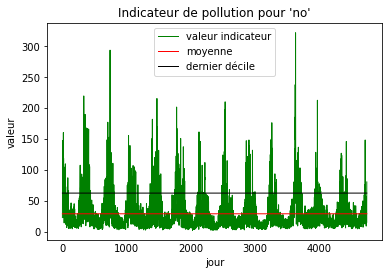

<Figure size 432x288 with 0 Axes>

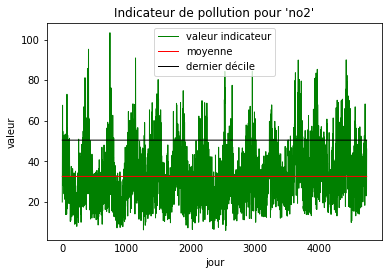

<Figure size 432x288 with 0 Axes>

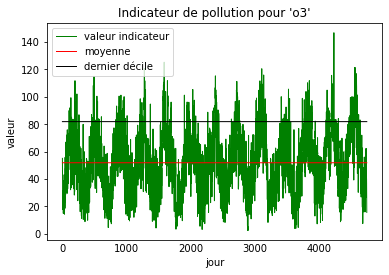

<Figure size 432x288 with 0 Axes>

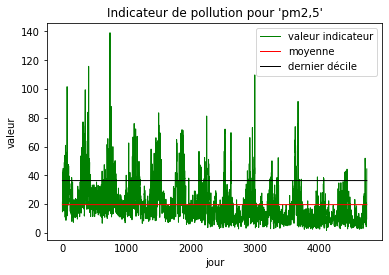

<Figure size 432x288 with 0 Axes>

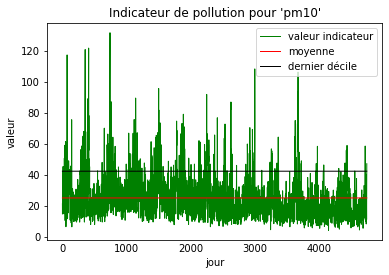

In [22]:
for i in range(len(polluants)):
    plot_variation_pollution(i)

Ajout des outils statistiques dans les dataframes

In [23]:
def add_stats(dataframe, n):
    values = []
    for i in range(len(dataframe)):
        temp = []
        for j in range(len(df_stats.iloc[0])):
            if (dataframe['indicateur'][i] > df_stats.iloc[n,j]):
                temp.append(1)
            else:
                temp.append(0)
        values.append(temp)
    ar = numpy.array(values)
    ar = ar.transpose()
    for i in range(len(statistiques)):
        dataframe[statistiques[i]] = ar[i]
    return dataframe

def add_seuil(dataframe, seuil):
    values = []
    for i in range(len(dataframe)):
        if (dataframe['indicateur'][i] > seuil):
            values.append(1)
        else:
            values.append(0)
    ar = numpy.array(values)
    ar = ar.transpose()
    dataframe['seuil_oms'] = ar
    return dataframe

In [24]:
print("Processing: ", end='')
percent = 0
for i in range(len(df_pollution)):
    if (int(i*100 / len(polluants)) > percent):
            percent = int(i*100 / len(polluants))
            string = str(percent) + "% - "
            print(string, end = '')
    df_pollution[i] = add_stats(df_pollution[i], i)
print("100%\n")
    
for i in range(len(polluants)):
    if (polluants[i] == 'pm2,5'):
        df_pollution[i] = add_seuil(df_pollution[i], 25)
    elif (polluants[i] == 'pm10'):
        df_pollution[i] = add_seuil(df_pollution[i], 50)

save('stats')

Processing: 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


20% - 40% - 60% - 80% - 100%

Saved to : 'pollution/mesures/stats/no_stats.csv'


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Saved to : 'pollution/mesures/stats/no2_stats.csv'
Saved to : 'pollution/mesures/stats/o3_stats.csv'
Saved to : 'pollution/mesures/stats/pm2,5_stats.csv'
Saved to : 'pollution/mesures/stats/pm10_stats.csv'


Moyenne glissante sur 7 jours

In [25]:
def plot_moyenne_glissante(n):
    plt.clf()
    moy_gliss = 0.0
    for i in range(len(df_pollution[n]['indicateur'])):
        if i < 7:
            moy_gliss = moy_gliss + float(df_pollution[n]['indicateur'][i]) / float(7)
        else:
            moy_gliss = moy_gliss + float(df_pollution[n]['indicateur'][i]) / float(7)
            moy_gliss = moy_gliss - float(df_pollution[n]['indicateur'][i-7]) / float(7)
            liste.append(moy_gliss)
    titre = 'Moyenne glissante sur 7 jour pour ' + polluants[n] 
    plt.title(titre)
    plt.xlabel('Jour')
    plt.ylabel('Moyenne glissante')
    plt.plot(numpy.arange(len(df_pollution[n].index) - 7), liste, color='red', linewidth=1)
    plt.show()

In [26]:
def plot_moyenne_glissante(n, jour_glissant):
    plt.clf()
    liste = []
    moy_gliss = 0.0
    for i in range(len(df_pollution[n]['indicateur'])):
        if i < jour_glissant:
            moy_gliss = moy_gliss + float(df_pollution[n]['indicateur'][i]) / float(jour_glissant)
        else:
            moy_gliss = moy_gliss + float(df_pollution[n]['indicateur'][i]) / float(jour_glissant)
            moy_gliss = moy_gliss - float(df_pollution[n]['indicateur'][i-jour_glissant]) / float(jour_glissant)
            liste.append(moy_gliss)
    plt.clf()
    # Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
    fig, ax = plt.subplots()  # Create a figure and an axes.
    length = len(df_pollution[n]['indicateur'])
    ax.plot(numpy.arange(len(df_pollution[n].index) - 7), liste, color='red', linewidth=1, label = 'moyenne glissante')
    ax.set_xlabel('Jour')  # Add an x-label to the axes.
    ax.set_ylabel('Moyenne glissante')  # Add a y-label to the axes.
    titre = 'Moyenne glissante sur 7 jour pour \'' + polluants[n] + '\'' 
    ax.set_title(titre)  # Add a title to the axes.
    ax.legend()  # Add a legend.
    plt.show()

<Figure size 432x288 with 0 Axes>

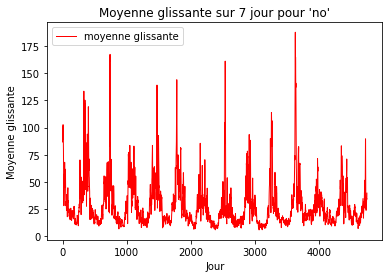

<Figure size 432x288 with 0 Axes>

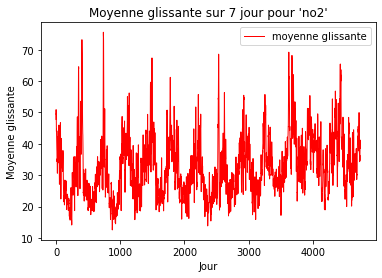

<Figure size 432x288 with 0 Axes>

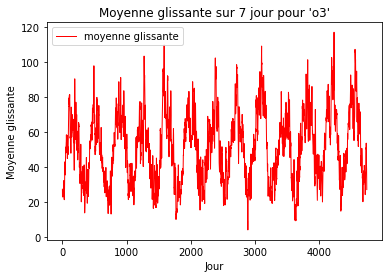

<Figure size 432x288 with 0 Axes>

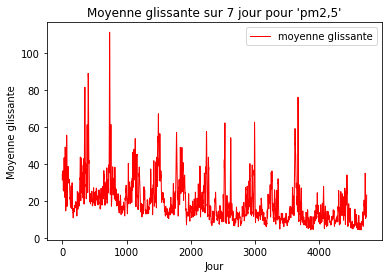

<Figure size 432x288 with 0 Axes>

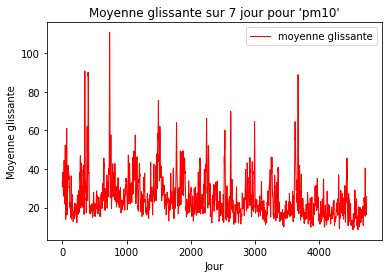

In [27]:
for i in range(len(polluants)):
    plot_moyenne_glissante(i,7)

----------------------------------------

### 2. Données de mortalité

In [28]:
filepath = 'mortalite/journaliers_2018-2019/'

annees_mortalite = [2018,2019]
df_mortalite = []


def read_file_mortalite(annee):
    filename = filepath + 'init/' + str(annee) + '.csv'
    temp_df = pd.read_csv(filename, sep=";")
    data = []
    nom_ligne = []
    for i in range(len(temp_df)):
        if (str(temp_df.iloc[i,9]) >= str(69000) and str(temp_df.iloc[i,9]) < str(70000)):
            temp = []
            nom_ligne.append(str(temp_df.iloc[i,0]) + '-' + str(temp_df.iloc[i,1]) + '-' + str(temp_df.iloc[i,2]))
            temp.append(temp_df.iloc[i,3])
            temp.append(temp_df.iloc[i,4])
            temp.append(str(temp_df.iloc[i,5]) + '-' + str(temp_df.iloc[i,6]) + '-' + str(temp_df.iloc[i,7]))
            temp.append(temp_df.iloc[i,8])
            temp.append(temp_df.iloc[i,9])
            temp.append(temp_df.iloc[i,10])
            data.append(temp)
    ar = numpy.array(data)
    colnames = ['dep_deces', 'com_deces', 'date_naissance', 'sexe', 'com_deces', 'lieu_deces']
    temp_df = pd.DataFrame(ar, index = nom_ligne, columns = colnames)
    return temp_df

def save_mortalite(step):
    for i in range(len(annees_mortalite)):
        filename  = str(filepath + step + '/' + str(annees_mortalite[i]) + '_' + step + '.csv')
        df_mortalite[i].to_csv(filename, sep=";", header=True)
        string = 'Saved to : \'' + filename + '\''
        print(string)
        
def mortalite_quotidiennne(temp_df):
    data = []
    temp_index = temp_df.index.values[0]
    new_index = []
    new_index.append(temp_index)
    n = 0
    for i in range(len(temp_df.index.values)):
        if (temp_df.index.values[i] == temp_index):
            n = n + 1
        else:
            temp_index = temp_df.index.values[i]
            new_index.append(temp_index)
            data.append(n)
            n = 0
    data.append(n)
    ar = numpy.array(data)
    colnames = ['nb_deces']
    temp_df = pd.DataFrame(ar, index = new_index, columns = colnames)
    return temp_df

In [29]:
for i in range(len(annees_mortalite)):
    df_mortalite.append(read_file_mortalite(annees_mortalite[i]))
    
save_mortalite('cleaned')

Saved to : 'mortalite/journaliers_2018-2019/cleaned/2018_cleaned.csv'
Saved to : 'mortalite/journaliers_2018-2019/cleaned/2019_cleaned.csv'


In [30]:
for i in range(len(annees_mortalite)):
    df_mortalite[i] = mortalite_quotidiennne(df_mortalite[i])
    
save_mortalite('quotidienne')

Saved to : 'mortalite/journaliers_2018-2019/quotidienne/2018_quotidienne.csv'
Saved to : 'mortalite/journaliers_2018-2019/quotidienne/2019_quotidienne.csv'
